In [1]:
A Classification Decision Tree is a type of machine learning model used for classification tasks. 
The Classification Decision Tree solve supervised learning problems, meaning the data has labeled examples (input-output pairs).
examples: Predicting whether a patient has diabetes based on features like blood sugar level, age, and weight.
The interpretable rules help doctors understand how a prediction was made 
Classification Decision Tree:
    Problem: Solves classification problems where the output is categorical (e.g., "Yes/No", "Red/Green/Blue").
    Goal: Assign the input data to one of the predefined classes based on decision rules.

Multiple Linear Regression:
    Problem: Solves regression problems where the output is continuous (e.g., predicting house price, temperature, or revenue).
    Goal: Predict a numeric value based on the relationship between input features and the output.

SyntaxError: invalid syntax (4276307901.py, line 1)

In [2]:
 Balanced datasets with equal cost for FP and FN.
Critical to detect positives (e.g., life-threatening conditions).
Critical to avoid false positives (e.g., avoid mislabeling legitimate activities as malicious).
Confidence in positive predictions is essential (e.g., high-risk decisions).

SyntaxError: invalid syntax (3307422091.py, line 1)

In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

columns_to_remove = ["Weight_oz", "Width", "Height"]
ab_reduced = ab.drop(columns=columns_to_remove, errors='ignore')

ab_reduced_noNaN = ab_reduced.dropna()

ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

data_info = ab_reduced_noNaN.info()

numeric_summary = ab_reduced_noNaN.describe()

categorical_summary = ab_reduced_noNaN.describe(include=["category"])

missing_values = ab_reduced_noNaN.isnull().sum()

print("Data Info:\n", data_info)
print("\nNumeric Summary:\n", numeric_summary)
print("\nCategorical Summary:\n", categorical_summary)
print("\nMissing Values:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
Data Info:
 None

Numeric Summary:
        List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.6015

/tmp/ipykernel_52/3832776763.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
/tmp/ipykernel_52/3832776763.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
/tmp/ipykernel_52/3832776763.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

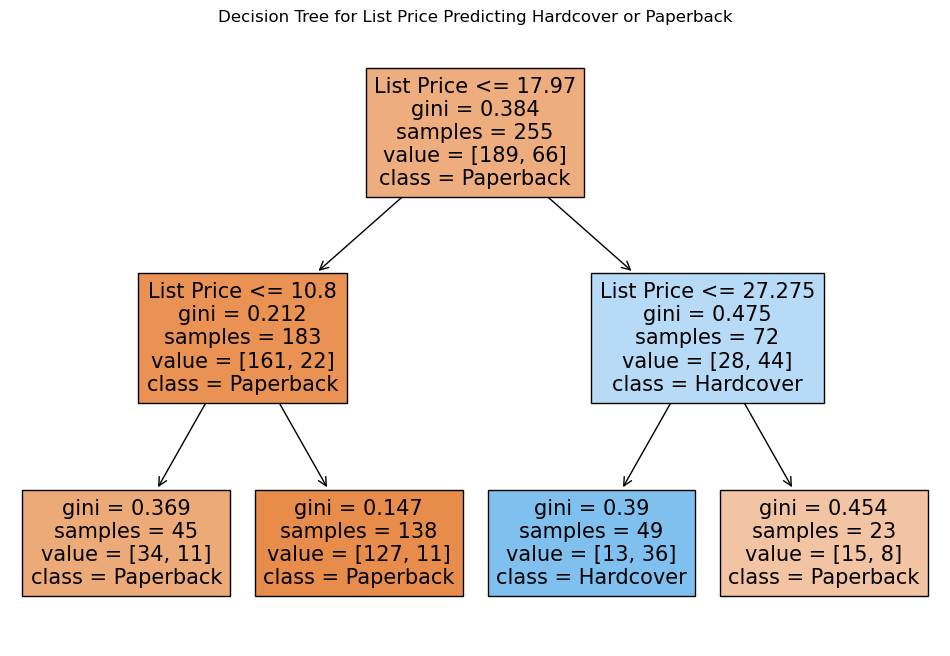

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Define features (X) and target (y)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.title("Decision Tree for List Price Predicting Hardcover or Paperback")
plt.show()


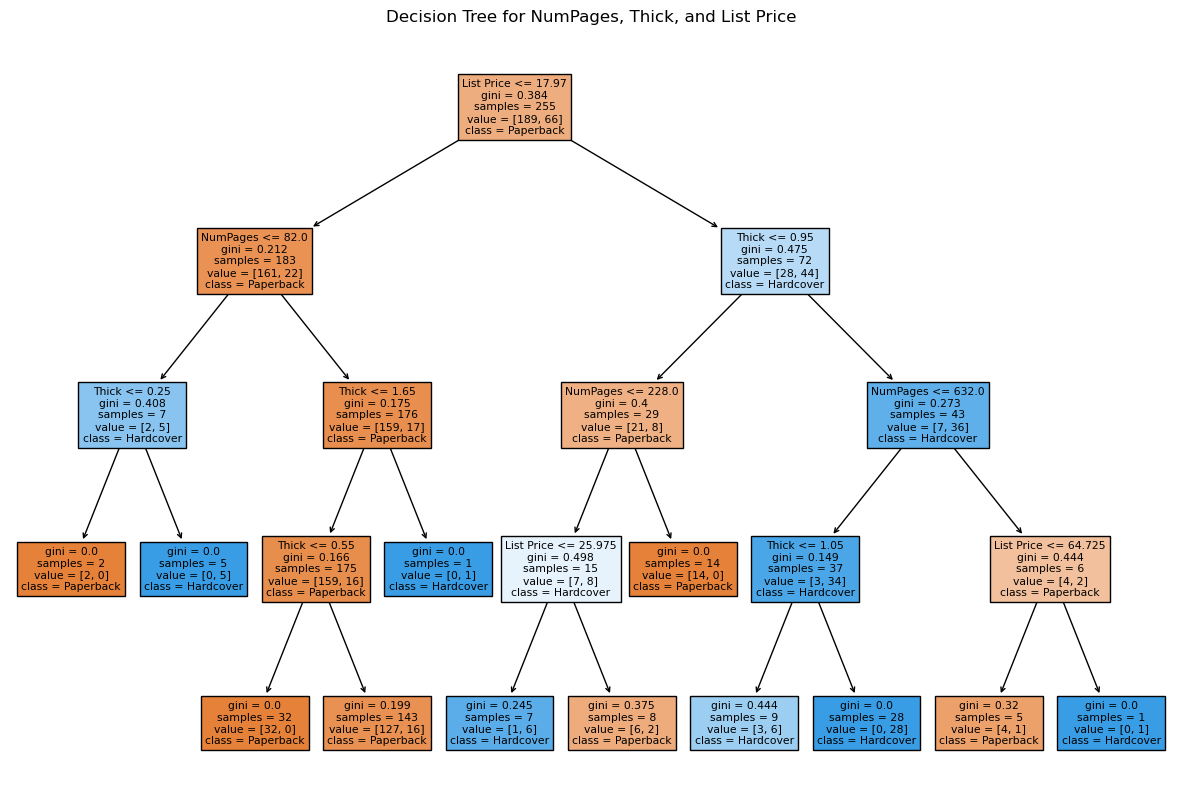

In [7]:
# Define features (X) and target (y)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], filled=True)
plt.title("Decision Tree for NumPages, Thick, and List Price")
plt.show()


/tmp/ipykernel_52/627917672.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
/tmp/ipykernel_52/627917672.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
/tmp/ipykernel_52/627917672.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

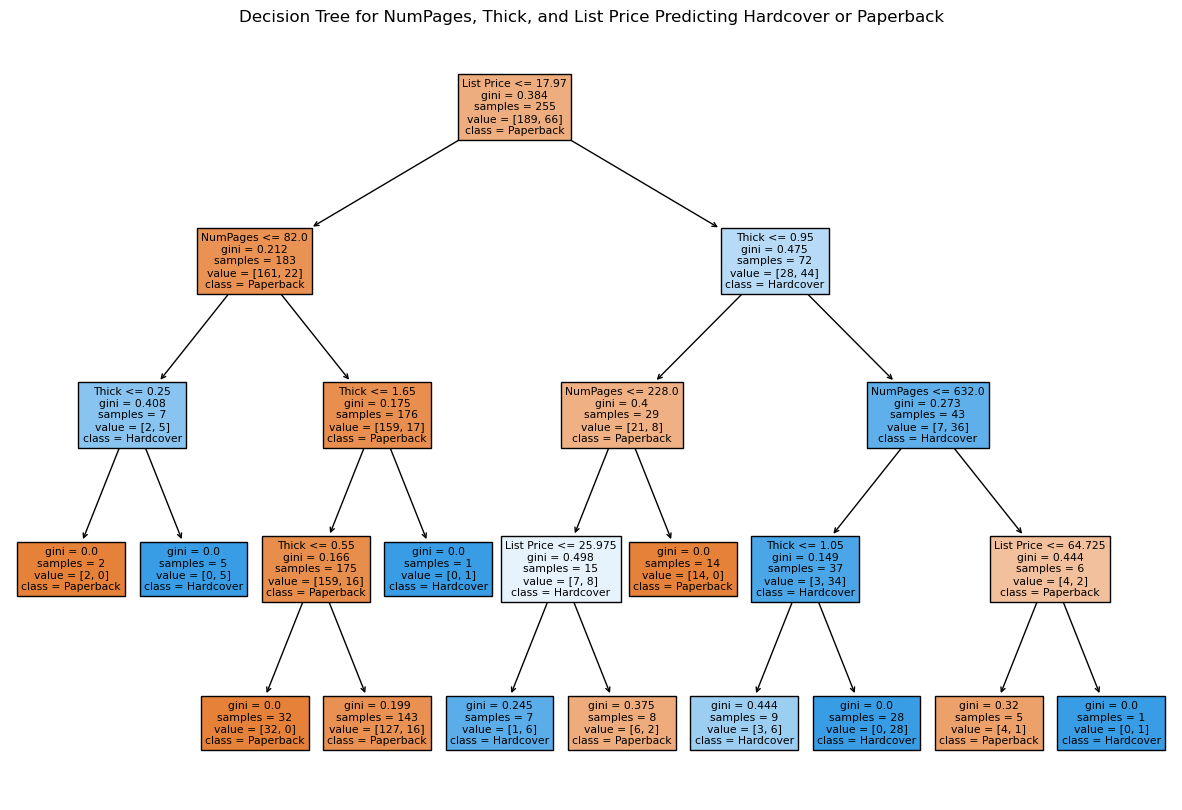

Confusion Matrix:
 [[40  4]
 [ 5 15]]
Sensitivity (Recall): 0.75
Specificity: 0.9090909090909091
Accuracy: 0.859375


In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

columns_to_remove = ["Weight_oz", "Width", "Height"]
ab_reduced = ab.drop(columns=columns_to_remove, errors='ignore')
ab_reduced_noNaN = ab_reduced.dropna()
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], filled=True)
plt.title("Decision Tree for NumPages, Thick, and List Price Predicting Hardcover or Paperback")
plt.show()

y_pred_clf2 = clf2.predict(X_test)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)  # 灵敏度
specificity_clf2 = cm_clf2[0, 0] / (cm_clf2[0, 0] + cm_clf2[0, 1])  # 特异性
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)  # 准确率

print("Confusion Matrix:\n", cm_clf2)
print("Sensitivity (Recall):", sensitivity_clf2)
print("Specificity:", specificity_clf2)
print("Accuracy:", accuracy_clf2)


In [10]:
The first confusion matrix is based on clf, which uses only the single feature List Price, 
    resulting in a simpler decision boundary and likely poorer performance due to insufficient information about the books.
In contrast, the second confusion matrix is based on a model using additional features (NumPages, Thick, and List Price), 
    allowing for more complex and accurate decision-making.

SyntaxError: invalid syntax (3410826937.py, line 1)

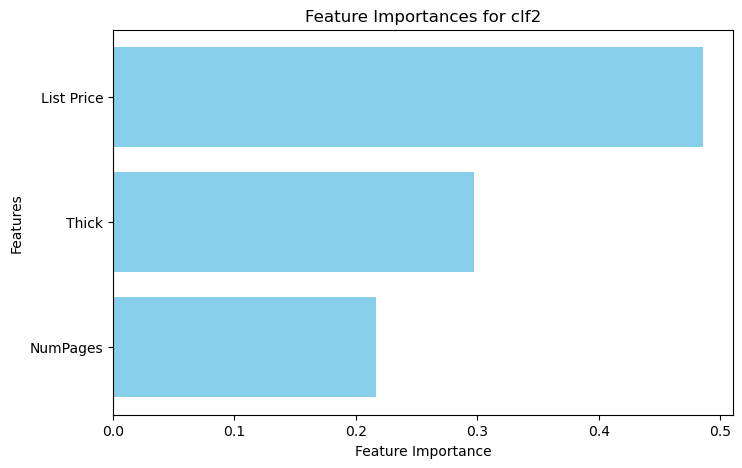

'List Price'

In [11]:
import matplotlib.pyplot as plt

# Extract feature importances and corresponding feature names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Plot the feature importances
plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances for clf2")
plt.show()

# Identify the most important feature
most_important_feature = feature_names[feature_importances.argmax()]
most_important_feature


In [12]:
Linear regression coefficients show the direct impact and direction of each variable on the target, assuming a linear relationship. 
Feature importances in decision trees reflect how much each feature improves predictions but only indicate relative importance, not direction or magnitude.

SyntaxError: invalid syntax (3427549497.py, line 1)

In [ ]:
chatbot history：https://chatgpt.com/c/673e36d0-7c00-8012-9697-262261f0c13a